In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Clothing_Store.csv") # load CSV file

### Data Cleaning ###

In [219]:
X = df.iloc[:, :-1]


phone = pd.get_dummies(X['VALPHON'], drop_first=True) # Get dummy
phone = phone.rename(columns = {'Y':'VALPHON'})

X = X.drop('VALPHON', axis=1)
X = X.drop('HHKEY', axis=1)

# Cleaned Variables & target
X = pd.concat([X, phone], axis=1)
y = df.iloc[:,-1]

# Split the data into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 460475789)

X_train.to_csv('Clean X_train.csv')
y_train.to_csv('Clean y_train.csv')

X_test.to_csv('Clean X_test.csv')
y_test.to_csv('Clean y_test.csv')

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(17392, 49) (17392,) (4348, 49) (4348,)


we have 17392 customer information, with 49 features in training set

## Data Understanding 

In [220]:
import scipy as sp

In [221]:
sp.sum(sp.isnan(y)) # missing value check

0

In [222]:
float(sum(y_train))/float(len(y_train))*100 # % of +ve response

16.582336706531738

In [223]:
# correlations between 50 variables & y
corr_y = df.corr().RESP.sort_values(ascending = False)
corr_y_abs = df.corr().RESP.abs().sort_values(ascending = False)
print("corr +ve relationship w/ response only")
print(corr_y.head(11))

print("corr +/- ve relationships w/ response")
print(corr_y_abs.head(11))

corr +ve relationship w/ response only
RESP            1.000000
FRE             0.407606
CLASSES         0.372776
STYLES          0.364063
RESPONDED       0.350589
RESPONSERATE    0.331459
MON             0.322801
SMONSPEND       0.310150
COUPONS         0.307182
STORES          0.304242
TMONSPEND       0.267705
Name: RESP, dtype: float64
corr +/- ve relationships w/ response
RESP            1.000000
FRE             0.407606
CLASSES         0.372776
STYLES          0.364063
RESPONDED       0.350589
RESPONSERATE    0.331459
MON             0.322801
SMONSPEND       0.310150
LTFREDAY        0.307191
COUPONS         0.307182
STORES          0.304242
Name: RESP, dtype: float64


corr above 0.3, only "LTFREDAY" shows -ve relationship w/ response

In [224]:
# plots for FRE , Classes, & LTFREDAY (univariate distribution)
import matplotlib.pyplot as plt
import seaborn as sns
def hist(series):
    fig, ax= plt.subplots()
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.9, 'edgecolor':'black', 'color': sns.color_palette('Blues', n_colors=2)[-1]},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    return fig, ax

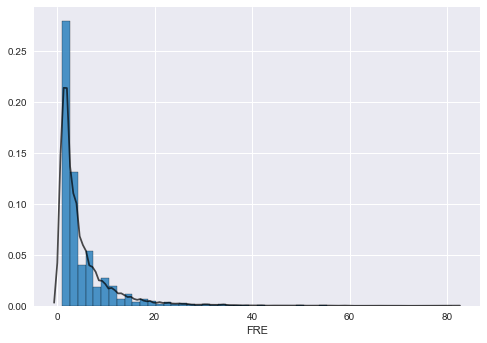

In [225]:
hist(X_train['FRE']) # FRE
sns.despine()
plt.show()

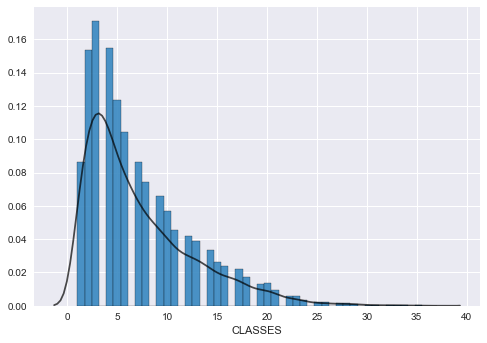

In [226]:
hist(X_train['CLASSES']) # Classes
sns.despine()
plt.show()

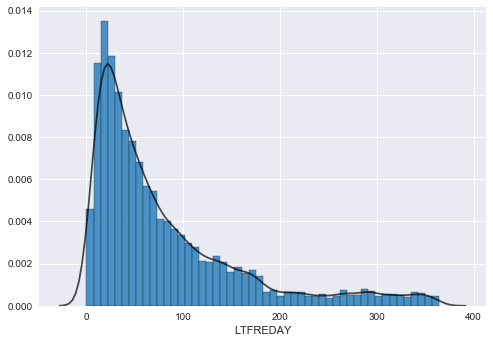

In [227]:
hist(X_train['LTFREDAY']) # Ltfreday
sns.despine()
plt.show()

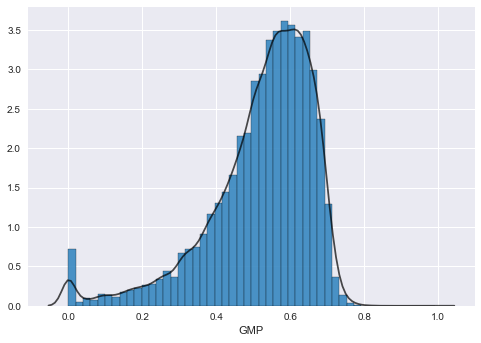

In [228]:
hist(X_train['GMP']) # GMP - 画这个的原因是因为，随意看看
sns.despine()
plt.show()

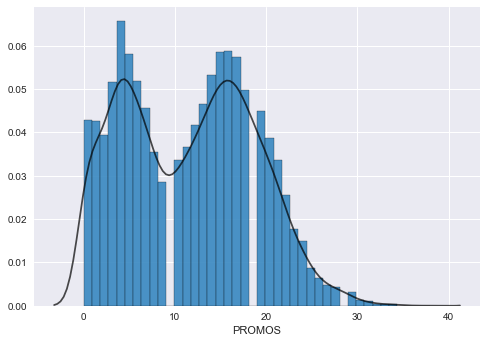

In [229]:
hist(X_train['PROMOS']) # PROMOS - 画这个的原因是因为，随意看看
sns.despine()
plt.show()

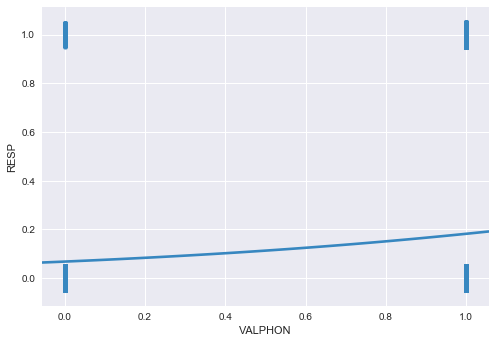

In [230]:
#把三个FLAG的变量【binary】画出来
sns.regplot(X_train["VALPHON"], y_train, color=sns.color_palette('Blues', n_colors=2)[-1], ci=None, logistic=True, y_jitter=0.05, 
            scatter_kws={'s': 25, 'color': sns.color_palette('Blues', n_colors=2)[-1], 'alpha': .5})
sns.despine()
plt.show()

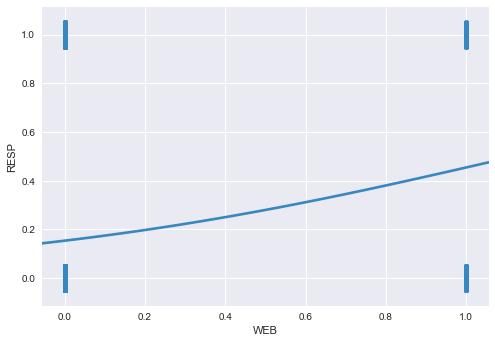

In [231]:
sns.regplot(X_train["WEB"], y_train, color=sns.color_palette('Blues', n_colors=2)[-1], ci=None, logistic=True, y_jitter=0.05, 
            scatter_kws={'s': 25, 'color': sns.color_palette('Blues', n_colors=2)[-1], 'alpha': .5})
sns.despine()
plt.show()

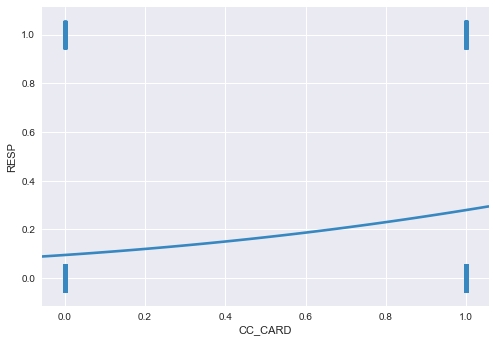

In [232]:
sns.regplot(X_train["CC_CARD"], y_train, color=sns.color_palette('Blues', n_colors=2)[-1], ci=None, logistic=True, y_jitter=0.05, 
            scatter_kws={'s': 25, 'color': sns.color_palette('Blues', n_colors=2)[-1], 'alpha': .5})
sns.despine()
plt.show()

#### X们

In [233]:
# Descriptive analysis + skew & kurt
descrip = X_train.describe()
descrip.loc['skew', :] = X_train.skew()
descrip.loc['kurt', :] = X_train.kurt()
print(descrip.round(3).head(5))

descrip.to_csv('descriptive for X_train.csv')

        ZIP_CODE        REC        FRE        MON    CC_CARD       AVRG  \
count  17392.000  17392.000  17392.000  17392.000  17392.000  17392.000   
mean   48956.195    126.818      5.094    477.304      0.386    114.211   
std    24043.618    104.665      6.429    654.513      0.487     87.020   
min     1001.000      1.000      1.000      0.990      0.000      0.490   
25%    30342.000     35.000      1.000    136.000      0.000     61.198   

       PC_CALC20  PSWEATERS  PKNIT_TOPS  PKNIT_DRES    ...       STORELOY  \
count  17392.000  17392.000   17392.000   17392.000    ...      17392.000   
mean      12.580      0.215       0.027       0.041    ...       2109.432   
std        2.462      0.232       0.068       0.109    ...       1802.776   
min       11.000      0.000       0.000       0.000    ...          3.000   
25%       11.000      0.000       0.000       0.000    ...        337.000   

             WEB     MAILED  RESPONDED  RESPONSERATE         HI   LTFREDAY  \
count  1

## Variable selection

In [234]:
from statlearning import forward  # Forward method

fwd = forward()
fwd.fit(X_train, y_train)

In [240]:
idx = fwd.subset
print(idx)

[2, 45, 40, 4, 26, 43, 33, 3, 28, 47, 35, 44, 11, 30, 27, 24, 18, 5, 1, 48]


In [242]:
X_train[idx].head(5)

,FRE,LTFREDAY,WEB,CC_CARD,TMONSPEND,RESPONSERATE,FREDAYS,MON,SMONSPEND,PERCRET,CLASSES,HI,PJACKETS,GMP,OMONSPEND,CCSPEND,PJEWELRY,AVRG,REC,VALPHON
18411,7,19.42,0,0,132.88,100.00,19.42,397.83,397.83,0.03,12,11.30,0.19,0.47,52.0,177.96,0.06,56.83,8,1
19079,18,14.35,0,1,79.78,55.56,29.50,1064.35,684.68,0.28,12,12.83,0.08,0.49,79.0,78.33,0.00,59.13,1,1
20625,3,104.50,0,0,0.00,0.00,139.33,262.70,0.00,0.00,5,71.90,0.37,0.58,0.0,211.98,0.00,87.56,236,1
5085,8,17.91,0,0,67.49,50.00,26.87,895.42,562.45,0.00,13,24.54,0.03,0.54,47.5,885.42,0.02,111.92,22,1
6502,5,28.00,0,0,0.00,42.86,89.60,997.98,736.99,0.15,10,13.02,0.00,0.65,0.0,475.00,0.00,199.59,143,1


#### Dimension reduction methods

In [243]:
from statlearning import pcrCV
pcr=pcrCV(X_train, y_train)

In [244]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Cross validator
kf=KFold(len(X_train), shuffle=True, random_state=1) 

pcr.cv_score(X_train, np.ravel(y_train), cv=5)

0.33277090049685981

In [248]:
from sklearn.decomposition import PCA
pca = decomposition.PCA(n_components = 20)
pca.fit(X_train, y_train)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [249]:
var=pca.explained_variance_ratio_
print(var)
print(pca.components_)

[  9.92524469e-01   5.57141409e-03   1.30118829e-03   2.97496077e-04
   7.52046262e-05   5.72960552e-05   4.82622216e-05   4.04481380e-05
   2.58342836e-05   1.77604282e-05   1.25043070e-05   9.90947621e-06
   6.42176382e-06   6.19205478e-06   3.80099528e-06   7.76258137e-07
   5.38168281e-07   2.54537187e-07   1.34717473e-07   4.87995419e-08]
[[  9.99991695e-01   9.66221432e-05  -7.76130607e-06  -8.40910774e-04
   -9.66389290e-07   4.82299075e-05  -4.01792892e-06  -3.40961407e-07
   -3.49651369e-08  -2.14706917e-08   1.17201477e-07  -8.17416363e-08
   -2.55666054e-08  -4.42355283e-08   2.80568364e-08   7.11786808e-08
    1.13459234e-07   1.13050818e-07   1.86393799e-08   9.97028019e-08
    3.84416348e-09   1.44791164e-07  -1.59845664e-04  -6.59795331e-04
    9.65681975e-05  -1.18265963e-04  -1.38685633e-04  -5.92737038e-05
   -4.85011275e-04  -7.62072102e-05   6.48871676e-08  -1.87995672e-05
   -2.89357853e-04   7.03002370e-05  -5.99159743e-08  -4.99437711e-06
   -2.64052158e-06  -3.1

(20, 49)


In [267]:
var1=np.cumsum(pca.explained_variance_ratio_)
print(var1)

[ 0.99252447  0.99809588  0.99939707  0.99969457  0.99976977  0.99982707
  0.99987533  0.99991578  0.99994161  0.99995937  0.99997188  0.99998179
  0.99998821  0.9999944   0.9999982   0.99999898  0.99999952  0.99999977
  0.99999991  0.99999995]


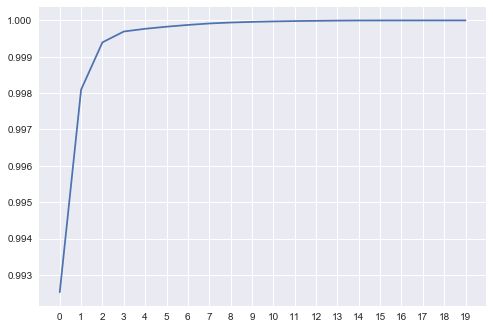

In [275]:
k = np.arange(20)
plt.plot(var1)
plt.xticks(k)
plt.show()

should use n_components = 9 for PCA method